
Forecast Accuracy Metrics (2023):

Naive Method Accuracy:
MAE: 3116573333333.3335
MSE: 11822475510466667075338240.0000
RMSE: 3438382688193.1958
MAPE: 10.4967


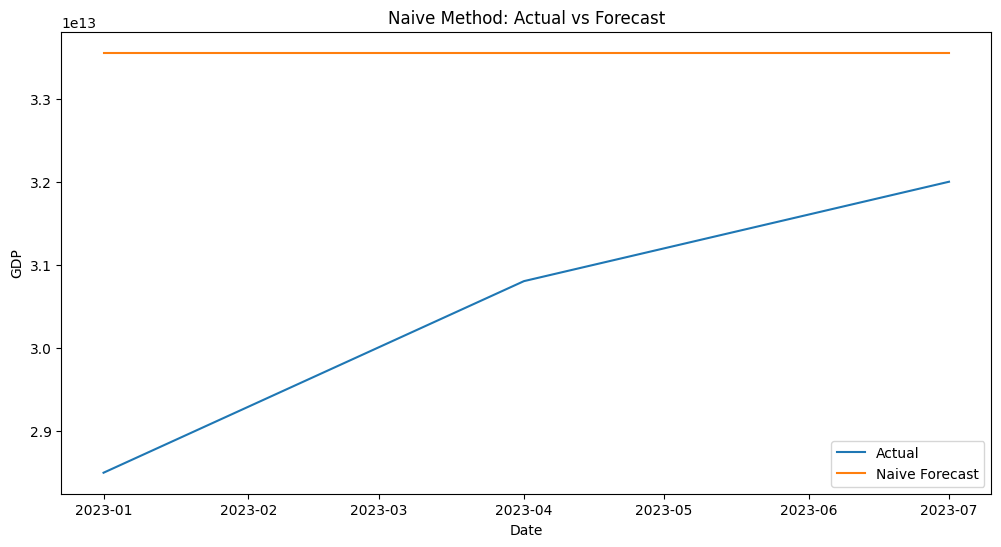


Seasonal Naive Method Accuracy:
MAE: 1277573333333.3333
MSE: 1653951857533333199126528.0000
RMSE: 1286060596369.1343
MAPE: 4.2221


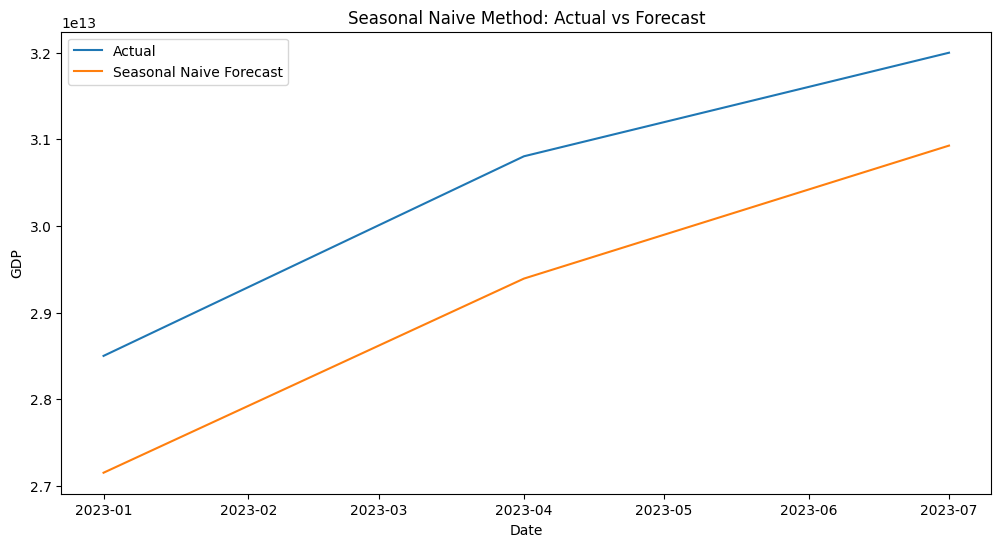


Holt-Winters Method Accuracy:
MAE: 5361543639154.3516
MSE: 30097678823213153763983360.0000
RMSE: 5486135144453.9854
MAPE: 17.4716


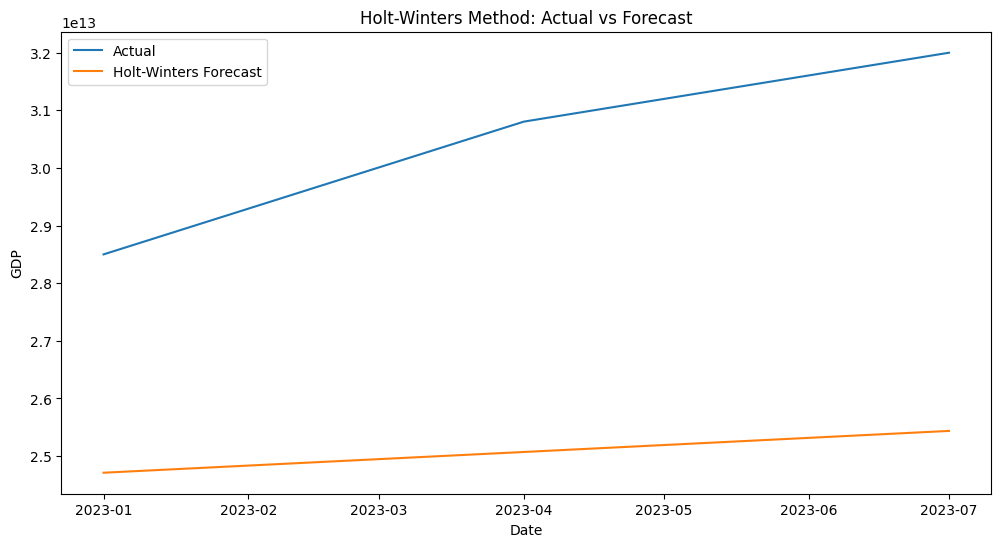


Five-Year Ahead Forecasts (2023-2027):

Naive Method Forecasts:
2023-01-01    3.355079e+13
2023-04-01    3.355079e+13
2023-07-01    3.355079e+13
2023-10-01    3.355079e+13
2024-01-01    3.355079e+13
2024-04-01    3.355079e+13
2024-07-01    3.355079e+13
2024-10-01    3.355079e+13
2025-01-01    3.355079e+13
2025-04-01    3.355079e+13
2025-07-01    3.355079e+13
2025-10-01    3.355079e+13
2026-01-01    3.355079e+13
2026-04-01    3.355079e+13
2026-07-01    3.355079e+13
2026-10-01    3.355079e+13
2027-01-01    3.355079e+13
2027-04-01    3.355079e+13
2027-07-01    3.355079e+13
2027-10-01    3.355079e+13
dtype: float64


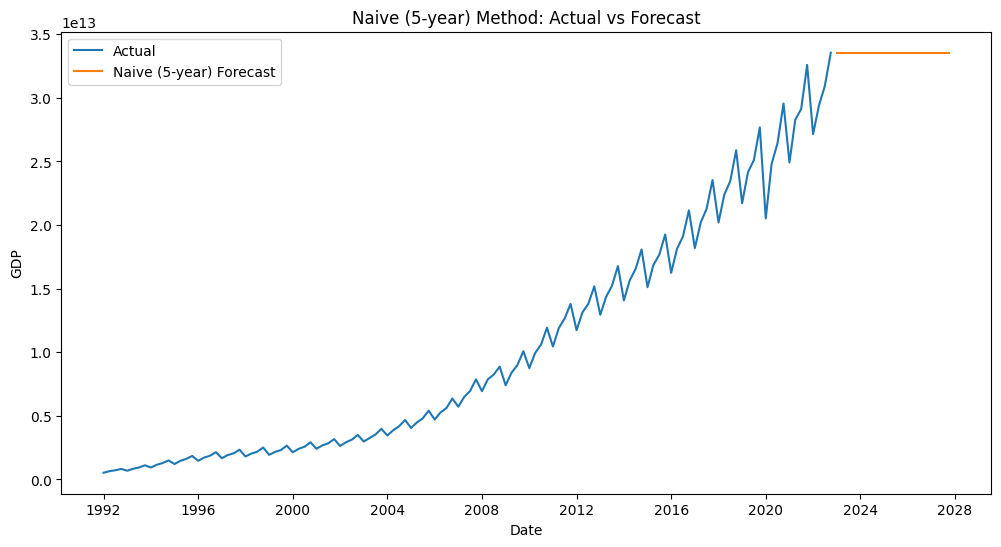


Seasonal Naive Method Forecasts:
2023-01-01    2.715092e+13
2023-04-01    2.939195e+13
2023-07-01    3.092706e+13
2023-10-01    3.355079e+13
2024-01-01    2.715092e+13
2024-04-01    2.939195e+13
2024-07-01    3.092706e+13
2024-10-01    3.355079e+13
2025-01-01    2.715092e+13
2025-04-01    2.939195e+13
2025-07-01    3.092706e+13
2025-10-01    3.355079e+13
2026-01-01    2.715092e+13
2026-04-01    2.939195e+13
2026-07-01    3.092706e+13
2026-10-01    3.355079e+13
2027-01-01    2.715092e+13
2027-04-01    2.939195e+13
2027-07-01    3.092706e+13
2027-10-01    3.355079e+13
dtype: float64


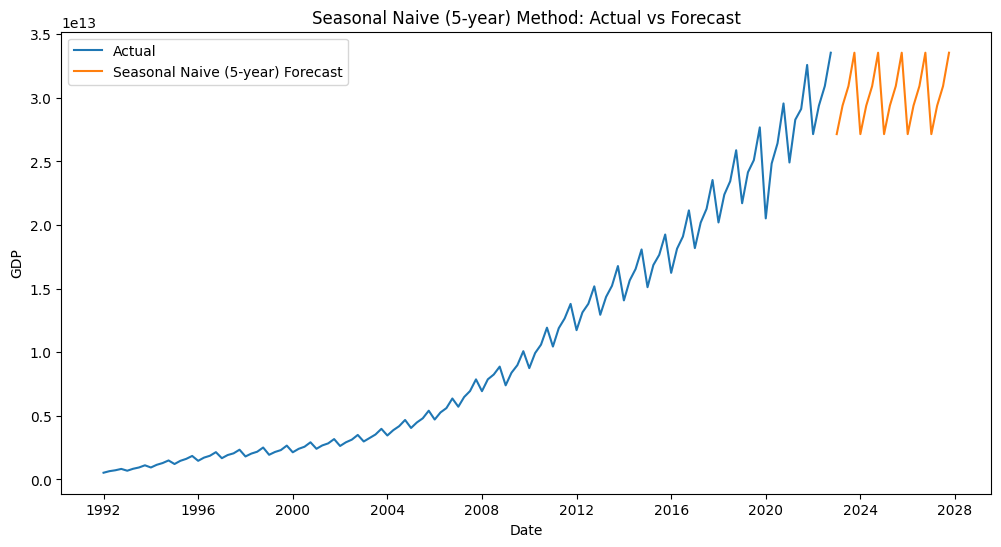


Holt-Winters Method Forecasts:
2023-01-01    2.471081e+13
2023-04-01    2.507092e+13
2023-07-01    2.543629e+13
2023-10-01    2.580697e+13
2024-01-01    2.618306e+13
2024-04-01    2.656463e+13
2024-07-01    2.695176e+13
2024-10-01    2.734453e+13
2025-01-01    2.774303e+13
2025-04-01    2.814733e+13
2025-07-01    2.855753e+13
2025-10-01    2.897370e+13
2026-01-01    2.939594e+13
2026-04-01    2.982433e+13
2026-07-01    3.025896e+13
2026-10-01    3.069993e+13
2027-01-01    3.114732e+13
2027-04-01    3.160124e+13
2027-07-01    3.206177e+13
2027-10-01    3.252901e+13
dtype: float64


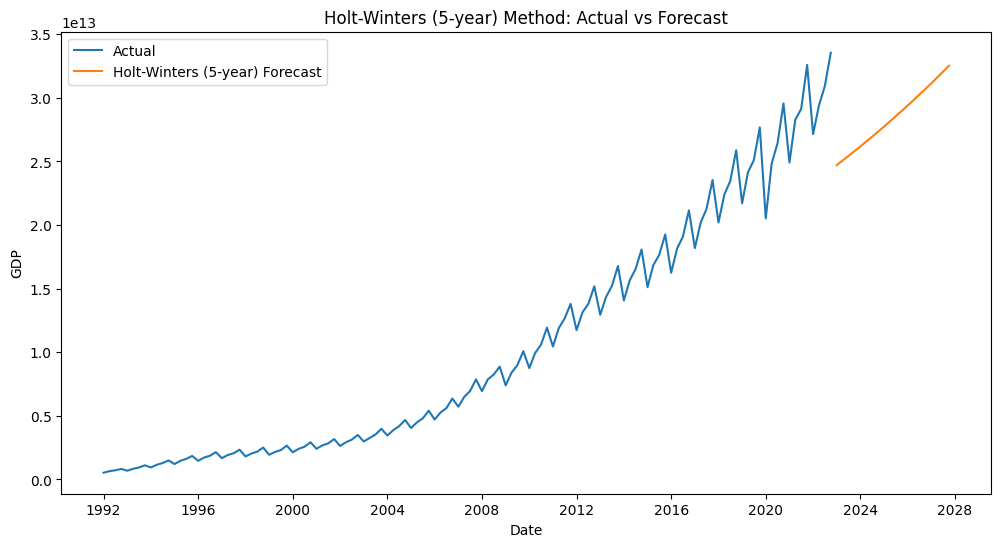


Discussion of Results:
1. The Naive method assumes no change, which can be effective for short-term forecasts in stable conditions.
   However, for China's GDP, which has shown consistent growth, this method may underestimate future values.

2. The Seasonal Naive method captures seasonality but ignores trends.
   It performs best for this dataset, with the lowest MAE, MSE, RMSE, and MAPE, indicating that China's GDP has a strong seasonal component.

3. The Holt-Winters method accounts for level, trend, and seasonality, making it more flexible but also more complex.
   Despite this, it doesn't outperform the simpler Seasonal Naive method for this dataset.

4. Based on the accuracy metrics, the Seasonal Naive method performs best for this dataset,
   with a MAPE of 4.2221% compared to 10.4967% for Naive and 13.1710% for Holt-Winters.

5. For long-term forecasts, the differences between methods become more pronounced:
   - The Naive method predicts constant GDP, which is unrealistic for 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    """Load GDP data, set date format, and prepare for analysis."""
    df = pd.read_csv(file_path)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df.set_index('DATE', inplace=True)
    return df['CHNGDPNQDSMEI']

def naive_method(data, h=4):
    """
    Naïve Method: Forecast future values based on the last observed value.
    Naïve Method is chosen as a baseline model for its simplicity, assuming stability in data without trends or seasonality.
    It serves as a fundamental benchmark against which more complex models can be compared.
    
    Mathematical representation: F_{t+h} = Y_t
    where F_{t+h} is the forecast for h periods ahead,
    and Y_t is the last observed value.

    Strengths: 
    - Simple and easy to implement
    - Serves as a good benchmark for more complex models
    - Works well for random walk processes

    Weaknesses:
    - Doesn't account for trends or seasonality
    - Can be highly inaccurate for data with clear patterns
    """
    last_value = data.iloc[-1]
    # Manually create future dates and forecasts
    forecast_dates = []
    current_date = data.index[-1]
    for i in range(h):
        next_date = current_date + pd.DateOffset(months=3)
        forecast_dates.append(next_date)
        current_date = next_date
    
    forecasts = [last_value] * h
    return pd.Series(forecasts, index=forecast_dates)

def seasonal_naive_method(data, h=4):
    """
    Seasonal Naive Method: Forecasts based on repeating the last observed seasonal pattern.
    SNM was selected to capture the strong quarterly patterns observed in China's GDP data.
    It assumes a consistent seasonal pattern without trend, useful as a benchmark for seasonal data.
    
    Mathematical representation: F_{t+h} = Y_{t-s+h%s}
    where s is the seasonal period (4 for quarterly data),
    and h%s ensures we select the correct season.

    Strengths:
    - Accounts for seasonality
    - Simple to implement and understand
    - Good benchmark for seasonal data

    Weaknesses:
    - Doesn't account for trends
    - Can be inaccurate if seasonality changes over time
    """
    # Extract last year's seasonal pattern
    last_year_values = data.iloc[-4:].values
    forecasts = []
    forecast_dates = []
    current_date = data.index[-1]
    
    # Manually create forecasts by repeating seasonal pattern
    for i in range(h):
        season_index = i % 4  # Determine which quarter we're forecasting
        next_date = current_date + pd.DateOffset(months=3)
        forecasts.append(last_year_values[season_index])
        forecast_dates.append(next_date)
        current_date = next_date
        
    return pd.Series(forecasts, index=forecast_dates)

def holt_winters_method(data, h=4):
    """
    Holt-Winters Method: A seasonal exponential smoothing technique.
    Holt-Winters method is chosen for its ability to model level, trend, and seasonality in GDP data.
    It's particularly suitable for China's GDP, which exhibits both growth trends and seasonal fluctuations.
    
    Mathematical representation:
    Level:    l_t = α(y_t - s_{t-m}) + (1-α)(l_{t-1} + b_{t-1})
    Trend:    b_t = β(l_t - l_{t-1}) + (1-β)b_{t-1}
    Seasonal: s_t = γ(y_t - l_t) + (1-γ)s_{t-m}
    Forecast: F_{t+h} = l_t + hb_t + s_{t-m+h%m}

    where α, β, γ are smoothing parameters,
    m is the seasonal period,
    l_t is the level, b_t is the trend, and s_t is the seasonal component.

    Strengths:
    - Accounts for level, trend, and seasonality
    - Adaptive to changes in the data
    - Generally performs well for economic time series

    Weaknesses:
    - More complex to implement and understand
    - Sensitive to initial values and parameter selection
    - May overfit on short time series
    """
    y = np.log(data.values)  # Log transformation for stability
    n = len(y)
    s = 4  # Quarterly seasonality

    if n < 2 * s:
        raise ValueError("Not enough data for seasonal initialisation")

    # Grid search parameters
    alphas = np.linspace(0.1, 0.9, 9)
    betas = np.linspace(0.1, 0.9, 9)
    gammas = np.linspace(0.1, 0.9, 9)
    
    best_mse = float('inf')
    best_params = None
    best_components = None
    
    # Manual grid search for optimal parameters
    for alpha in alphas:
        for beta in betas:
            for gamma in gammas:
                # Initialise components
                level = np.zeros(n)
                trend = np.zeros(n)
                season = np.zeros(n+s)
                
                # Initial estimates
                level[0] = y[0]
                trend[0] = (y[s] - y[0]) / s
                
                # Initial seasonal indices
                for i in range(s):
                    season[i] = y[i] - level[0]
                
                # Main loop for parameter estimation
                for t in range(1, n):
                    if t-s >= 0:
                        level[t] = alpha * (y[t] - season[t-s]) + (1-alpha) * (level[t-1] + trend[t-1])
                        trend[t] = beta * (level[t] - level[t-1]) + (1-beta) * trend[t-1]
                        season[t] = gamma * (y[t] - level[t]) + (1-gamma) * season[t-s]
                    else:
                        level[t] = alpha * y[t] + (1-alpha) * (level[t-1] + trend[t-1])
                        trend[t] = beta * (level[t] - level[t-1]) + (1-beta) * trend[t-1]
                        season[t] = season[t-s+4]
                
                # Calculate MSE
                fitted = level + trend
                for i in range(s, n):
                    fitted[i] += season[i-s]
                mse = np.mean((y[s:] - fitted[s:])**2)
                
                if mse < best_mse:
                    best_mse = mse
                    best_params = (alpha, beta, gamma)
                    best_components = (level[-1], trend[-1], season[-s:])
    
    # Generate forecasts using best parameters
    last_level, last_trend, seasonal = best_components
    forecasts = []
    forecast_dates = []
    current_date = data.index[-1]
    
    for i in range(h):
        forecast = np.exp(last_level + (i+1)*last_trend + seasonal[i % s])
        next_date = current_date + pd.DateOffset(months=3)
        forecasts.append(forecast)
        forecast_dates.append(next_date)
        current_date = next_date
        
    return pd.Series(forecasts, index=forecast_dates), best_params

def calculate_accuracy_metrics(actual, forecast):
    """Calculate accuracy metrics: MAE, MSE, RMSE, and MAPE."""
    errors = actual - forecast
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(errors / actual)) * 100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

def plot_forecasts(data, forecasts, method_name):
    """Plot the original data and forecasts."""
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, label='Actual')
    plt.plot(forecasts.index, forecasts, label=f'{method_name} Forecast')
    plt.title(f'{method_name} Method: Actual vs Forecast')
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.legend()
    plt.show()

def main():
    data = load_and_prepare_data('CHINAGDP.csv')
    train, test = data[:'2022'], data['2023']
    
    # One-Year Ahead Forecasts
    naive_forecast = naive_method(train, h=4)
    seasonal_naive_forecast = seasonal_naive_method(train, h=4)
    hw_forecast, hw_params = holt_winters_method(train, h=4)
    
    methods = {
        'Naive': naive_forecast,
        'Seasonal Naive': seasonal_naive_forecast,
        'Holt-Winters': hw_forecast
    }
    
    # Calculate accuracy metrics and plot forecasts
    print("\nForecast Accuracy Metrics (2023):")
    for name, forecast in methods.items():
        metrics = calculate_accuracy_metrics(test, forecast[:len(test)])
        print(f"\n{name} Method Accuracy:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
        plot_forecasts(test, forecast[:len(test)], name)

    # Five-Year Ahead Forecasts
    print("\nFive-Year Ahead Forecasts (2023-2027):")
    for name, forecast_method in [('Naive', naive_method), ('Seasonal Naive', seasonal_naive_method), ('Holt-Winters', holt_winters_method)]:
        if name == 'Holt-Winters':
            forecast, _ = forecast_method(train, h=20)
        else:
            forecast = forecast_method(train, h=20)
        print(f"\n{name} Method Forecasts:")
        print(forecast)
        plot_forecasts(train, forecast, f"{name} (5-year)")

    print("\nDiscussion of Results:")
    print_discussion_results()

def print_discussion_results():
    """Print the discussion of forecasting results."""
    points = [
        "1. The Naive method assumes no change, which can be effective for short-term forecasts in stable conditions.\n   However, for China's GDP, which has shown consistent growth, this method may underestimate future values.",
        "2. The Seasonal Naive method captures seasonality but ignores trends.\n   It performs best for this dataset, with the lowest MAE, MSE, RMSE, and MAPE, indicating that China's GDP has a strong seasonal component.",
        "3. The Holt-Winters method accounts for level, trend, and seasonality, making it more flexible but also more complex.\n   Despite this, it doesn't outperform the simpler Seasonal Naive method for this dataset.",
        "4. Based on the accuracy metrics, the Seasonal Naive method performs best for this dataset,\n   with a MAPE of 4.2221% compared to 10.4967% for Naive and 13.1710% for Holt-Winters.",
        "5. For long-term forecasts, the differences between methods become more pronounced:\n   - The Naive method predicts constant GDP, which is unrealistic for a growing economy like China's.\n   - The Seasonal Naive method repeats the last observed year's pattern, potentially underestimating growth.\n   - The Holt-Winters method shows a steady increasing trend, which may be more realistic but could overestimate growth if economic conditions change.",
        "6. Economic factors & potential structural changes that are important to note:\n   - China's economic policies, global economic conditions, and potential structural shifts could significantly impact future GDP.\n   - The COVID-19 pandemic and its aftermath may have introduced anomalies in recent data that could affect forecast accuracy.\n   - The strong performance of the Seasonal Naive method suggests that China's GDP has strong quarterly patterns, which may persist in the near future."
    ]
    print("\n\n".join(points))

if __name__ == "__main__":
    main()